<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E4%BD%BF%E7%94%A8SVM%E5%AF%B9%E6%89%8B%E5%86%99%E6%95%B0%E5%AD%97%E7%9A%84%E8%AF%86%E5%88%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets,svm,metrics


In [3]:
## 加载数字图片数据
digits = datasets.load_digits()


In [11]:
## 获取样本数量，并将图片数据格式化
n_samples = len(digits.images)  #shape (1797, 8, 8)
# print(digits.images.shape)
data = digits.images.reshape((n_samples,-1)) #reshape(m, -1) 函数， 表示将此矩阵或者数组重组，以 m行n列的形式表示
print(data.shape)

(1797, 64)
[0 1 2 ... 8 9 8]


In [12]:
## 模型构建
classifier = svm.SVC(gamma=0.001)
## 使用二分之一的数据进行模型训练
classifier.fit(data[:int(n_samples/2)],digits.target[:int(n_samples/2)])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
## 测试数据部分实际值和预测值获取
expected = digits.target[int(n_samples / 2):]
predicted = classifier.predict(data[int(n_samples / 2):])

print("The classification effect of classifier %s :\n %s \n" %(classifier,metrics.classification_report(expected,predicted)))
print("Confusion matrix : \n %s" % metrics.confusion_matrix(expected,predicted))

The classification effect of classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weigh

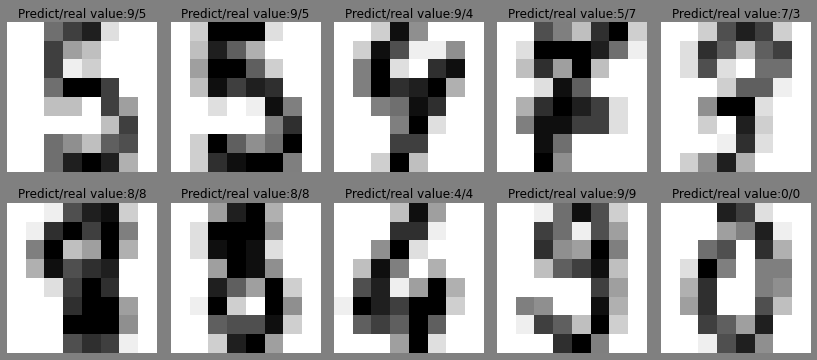

In [21]:
## 进行图片展示
plt.figure(facecolor='gray', figsize=(12,5))
## 先画出5个预测失败的
images_and_predictions = list(zip(digits.images[int(n_samples / 2):][expected != predicted], expected[expected != predicted], predicted[expected != predicted]))
for index, (image,expection, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predict/real value:%i/%i' % (prediction, expection))

## 再画出5个预测成功的
images_and_predictions = list(zip(digits.images[int(n_samples / 2):][expected == predicted], expected[expected == predicted], predicted[expected == predicted]))
for index, (image,expection, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 6)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'Predict/real value:%i/%i' % (prediction, expection))

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

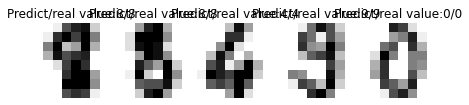